In [1]:
import torch
import torch.nn as nn
from torchvision.models._api import WeightsEnum

In [2]:
from torch.hub import load_state_dict_from_url
from pathlib import Path
from os import listdir
import numpy as np
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [3]:
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

In [4]:
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

model = torchvision.models.efficientnet_b0(weights=torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 63.8MB/s]


In [5]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
print(device)

cuda


In [7]:
X_train = torch.load('/kaggle/input/genre-dataset/genre_training_tensor_stack_input.pt')

In [8]:
X_test = torch.load('/kaggle/input/genre-dataset/genre_testing_tensor_stack_input.pt')

In [9]:
y_train = torch.load('/kaggle/input/genre-dataset/genre_training_tensor_output.pt')

In [10]:
y_test = torch.load('/kaggle/input/genre-dataset/genre_testing_tensor_output.pt')

In [11]:
first_tensor_shape = X_train[0].shape if isinstance(X_train, list) else X_train.shape

In [12]:
print(first_tensor_shape)

torch.Size([15167, 3, 224, 224])


In [13]:
channels = first_tensor_shape[1]
height = first_tensor_shape[2]
width = first_tensor_shape[3]

In [14]:
input_shape = (32, channels, height, width)

In [15]:
for param in model.parameters():
    param.requires_grad = False

In [16]:
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters in the model:", total_params)

Total parameters in the model: 5288548


In [17]:
num_fc_layers = sum(isinstance(module, nn.Linear) for module in model.modules())
print("Number of fully connected layers in the model:", num_fc_layers)

Number of fully connected layers in the model: 1


In [18]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [19]:
train_dataset = TensorDataset(X_train, y_train)

In [20]:
val_dataset = TensorDataset(X_test, y_test)

In [21]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [22]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

model = torchvision.models.efficientnet_b0(weights=torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [23]:
model.classifier[1] = nn.Sequential(
    nn.Linear(in_features=1280, out_features=1024, bias=True),
    nn.ReLU(inplace = True),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.2),
    nn.Linear(in_features=1024, out_features=10, bias=True)
)
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [24]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters in resnet: {total_params}")

Total number of parameters in resnet: 5331590


In [25]:
batch_size = 32
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy

In [27]:
import torch
import matplotlib.pyplot as plt

def test_plot(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    correct_labels = []
    misclassified_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            for i in range(len(labels)):
                if predicted[i] == labels[i]:
                    correct_labels.append(labels[i].item())
                else:
                    misclassified_labels.append((labels[i].item(), predicted[i].item()))

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

    plot_labels(correct_labels, misclassified_labels)

    return test_loss, test_accuracy


def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    return test_loss, test_accuracy

def plot_labels(correct_labels, misclassified_labels):
    all_labels = correct_labels + [label[0] for label in misclassified_labels]
    all_predictions = correct_labels + [label[1] for label in misclassified_labels]

    plt.figure(figsize=(10, 5))
    plt.hist([all_labels, all_predictions], bins=range(min(all_labels), max(all_labels) + 2), alpha=0.5, label=['Correct', 'Misclassified'])
    plt.xticks(range(min(all_labels), max(all_labels) + 1))
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Correct vs Misclassified Classes')
    plt.legend()
    plt.show()


Epoch [1/100], Train Loss: 1.1476, Train Accuracy: 62.53%, Test Loss: 1.1433, Test Accuracy: 61.31%
Epoch [2/100], Train Loss: 0.9000, Train Accuracy: 69.54%, Test Loss: 0.9229, Test Accuracy: 67.82%
Epoch [3/100], Train Loss: 0.7905, Train Accuracy: 73.44%, Test Loss: 0.9088, Test Accuracy: 69.56%
Epoch [4/100], Train Loss: 0.7026, Train Accuracy: 75.99%, Test Loss: 0.8492, Test Accuracy: 71.90%
Epoch [5/100], Train Loss: 0.7400, Train Accuracy: 75.95%, Test Loss: 0.8878, Test Accuracy: 70.69%
Epoch [6/100], Train Loss: 0.5690, Train Accuracy: 80.66%, Test Loss: 0.9330, Test Accuracy: 71.29%
Epoch [7/100], Train Loss: 0.5458, Train Accuracy: 82.12%, Test Loss: 0.9577, Test Accuracy: 70.35%
Epoch [8/100], Train Loss: 0.4515, Train Accuracy: 84.55%, Test Loss: 0.9629, Test Accuracy: 71.10%
Epoch [9/100], Train Loss: 0.3788, Train Accuracy: 87.39%, Test Loss: 1.1264, Test Accuracy: 69.13%
Epoch [10/100], Train Loss: 0.3332, Train Accuracy: 88.83%, Test Loss: 1.0635, Test Accuracy: 69.98%

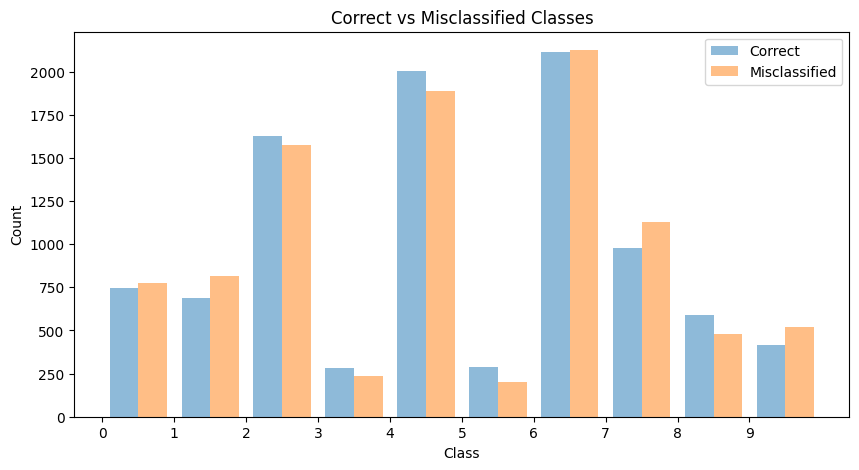

Train Loss: 0.0372, Train Accuracy: 98.81%, Test Loss: 1.9752, Test Accuracy: 68.29%


In [28]:
num_epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
epochs = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy = test(model, val_loader, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    epochs.append(epoch + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
train_loss, train_accuracy = train(model, train_loader, optimizer, criterion)
test_loss, test_accuracy = test_plot(model, val_loader, criterion)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


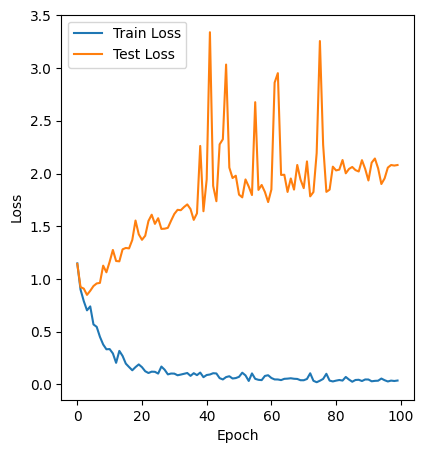

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

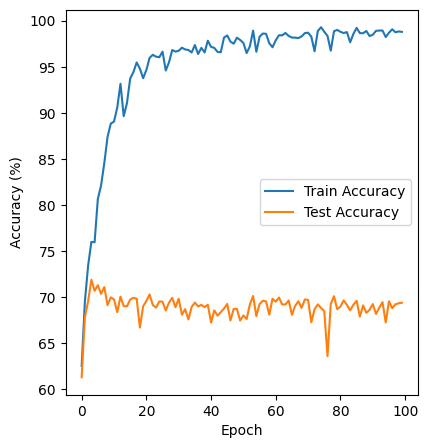

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

In [31]:
torch.save(model.state_dict(), 'model.pth')